In [1]:
import numpy as np
import pandas as pd
from importlib import reload
import custom_plot_v3
reload(custom_plot_v3)
from custom_plot_v3 import CustomPlot as CP
from datetime import datetime

In [2]:
base_path = 'data/'
file = base_path+'yields_weather_1970_2015.csv'
plot_path = 'test/'

In [3]:
raw_data = pd.read_csv(file)
raw_data.head()

Unnamed: 0  County  Year  Month  Day State  Precipitation (in)  \
0           1   17001  1970      8   26    IL            0.000000   
1           2   17001  1970      4   20    IL            0.223333   
2           3   17001  1970      8   18    IL            0.526667   
3           4   17001  1970      7   16    IL            0.000000   
4           5   17001  1970      8   30    IL            0.000000   

   Average Temperature (F)  Annual Corn Yield (BU/ACRE)  \
0                74.000000                         79.0   
1                48.333333                         79.0   
2                78.500000                         79.0   
3                71.833333                         79.0   
4                81.125000                         79.0   

   Growing Degree Days (Base: 50F)  Annual Acres Harvested - Corn  \
0                        24.000000                       120200.0   
1                         0.000000                       120200.0   
2                        28.500000                       120200.0   
3                        21.833333                       120200.0   
4                        31.125000                       120200.0   

   Annual.Wheat.Yield..BU.ACRE.  Annual.soybeans.Yield..BU.ACRE.  
0                          34.0                             32.5  
1                          34.0                             32.5  
2                          34.0                             32.5  
3                          34.0                             32.5  
4                          34.0                             32.5

In [4]:
raw_data.shape

(13434241, 13)

In [5]:
raw_data.rename(columns={'County':'county','Year':'year','Month':'month','Day':'day','State':'state',
                         'Precipitation (in)':'precipitation','Average Temperature (F)':'temperature',
                         'Annual Corn Yield (BU/ACRE)':'corn_yield','Growing Degree Days (Base: 50F)':'growing_degree_days',
                         'Annual Acres Harvested - Corn':'annual_acres_harvested_corn',
                         'Annual.Wheat.Yield..BU.ACRE.':'wheat_yield','Annual.soybeans.Yield..BU.ACRE.':'soybeans_yield'},
                inplace=True)
raw_data.head()

Unnamed: 0  county  year  month  day state  precipitation  temperature  \
0           1   17001  1970      8   26    IL       0.000000    74.000000   
1           2   17001  1970      4   20    IL       0.223333    48.333333   
2           3   17001  1970      8   18    IL       0.526667    78.500000   
3           4   17001  1970      7   16    IL       0.000000    71.833333   
4           5   17001  1970      8   30    IL       0.000000    81.125000   

   corn_yield  growing_degree_days  annual_acres_harvested_corn  wheat_yield  \
0        79.0            24.000000                     120200.0         34.0   
1        79.0             0.000000                     120200.0         34.0   
2        79.0            28.500000                     120200.0         34.0   
3        79.0            21.833333                     120200.0         34.0   
4        79.0            31.125000                     120200.0         34.0   

   soybeans_yield  
0            32.5  
1            32.5  
2            32.5  
3            32.5  
4            32.5

In [7]:
req_cols = ['county','year','month','day','state','precipitation','temperature','corn_yield','wheat_yield','soybeans_yield']
filtered_data = raw_data[req_cols]
filtered_data = filtered_data.sort_values(['state','county','year','month','day'])
filtered_data.reset_index(drop=True,inplace=True)
filtered_data.head()

county  year  month  day state  precipitation  temperature  corn_yield  \
0   19001  1970      1    1    IA           0.03         22.0        84.1   
1   19001  1970      1    2    IA           0.03         11.5        84.1   
2   19001  1970      1    3    IA            NaN          9.0        84.1   
3   19001  1970      1    4    IA           0.00         15.5        84.1   
4   19001  1970      1    5    IA           0.00          5.0        84.1   

   wheat_yield  soybeans_yield  
0          NaN            33.9  
1          NaN            33.9  
2          NaN            33.9  
3          NaN            33.9  
4          NaN            33.9

In [ ]:
gp_data = filtered_data.groupby(['state'])
keys = list(gp_data.groups.keys())
print(keys)

In [29]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i,j]>0:
                kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
                text = im.axes.text(j, i, valfmt(data[i, j], None), **kw, rotation=90)
                texts.append(text)

    return texts

In [48]:
fontsize = 7
font = {'family':'DejaVu Serif', 'weight': 'medium', 'size': fontsize}
matplotlib.rc('font', **font) 
matplotlib.rc('axes', titlesize=fontsize)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fontsize)    # legend fontsize
matplotlib.rc('figure', titlesize=fontsize)  # fontsize of the figure title

In [49]:
year_range = [2001, 2010]

year_data = filtered_data[(filtered_data.year>=year_range[0])&(filtered_data.year<=year_range[1])]
res = year_data.groupby(['state']).agg({'corn_yield':'mean','soybeans_yield':'mean'})
res.reset_index(inplace=True)
res.head()

state  corn_yield  soybeans_yield
0    IA  163.384050       47.121040
1    IL  154.304392       44.622550
2    IN  150.271363       45.750995
3    KS  118.913938       34.578068
4    MN  145.427240       39.136015

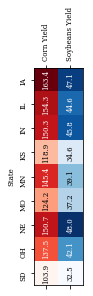

In [50]:
cols = ['corn_yield','soybeans_yield']
data = res[cols]
fig,ax = plt.subplots()
im1 = ax.matshow(data.mask(((data == data) | data.isnull()) & (data.columns != 'corn_yield')), 
           cmap=cm.Reds)
im2 = ax.matshow(data.mask(((data == data) | data.isnull()) & (data.columns != 'soybeans_yield')), 
           cmap=cm.Blues) # You can change the colormap here
plt.xticks(range(2), ['Corn Yield', 'Soybeans Yield'], rotation=90)
plt.yticks(range(9), res.state.values, rotation=90)
plt.ylabel('State')

texts = annotate_heatmap(im1, valfmt="{x:.1f}")
texts = annotate_heatmap(im2, valfmt="{x:.1f}")
plt.savefig('state_yield_heatmap.'+'pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
gp_data = filtered_data.groupby(['state'])
IN_data = gp_data.get_group('IN')

year_range = [2001, 2010]
year_data_IN = IN_data[(IN_data.year>=year_range[0])&(IN_data.year<=year_range[1])]

county_gp = year_data_IN.groupby(['county'])

In [52]:
whin_counties = [18131, 18181, 18017, 18007, 18015, 18157, 18171, 18045, 18107, 18023]

county_dict = {18131:'Pulaski', 
               18181:'White', 
               18017:'Cass', 
               18007:'Benton', 
               18015:'Carroll', 
               18157:'Tippecanoe', 
               18171:'Warren', 
               18045:'Fountain', 
               18107:'Montgomery', 
               18023:'Clinton'}

In [53]:
records = []
for c in county_dict:
    county_data = county_gp.get_group(c)
    corn_yield = county_data['corn_yield'].mean()
    soybeans_yield = county_data['soybeans_yield'].mean()
    records.append({'county':county_dict[c], 'corn_yield':corn_yield, 'soybeans_yield':soybeans_yield})
res = pd.DataFrame(records)
res.head()

corn_yield   county  soybeans_yield
0  150.519387  Pulaski       43.742525
1  169.167826    White       50.152163
2  161.590471     Cass       49.472234
3  169.595099   Benton       50.811199
4  175.128861  Carroll       54.211939

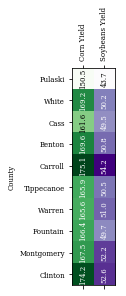

In [54]:
cols = ['corn_yield','soybeans_yield']
data = res[cols]
fig,ax = plt.subplots()
im1 = ax.matshow(data.mask(((data == data) | data.isnull()) & (data.columns != 'corn_yield')), 
           cmap=cm.Greens)
im2 = ax.matshow(data.mask(((data == data) | data.isnull()) & (data.columns != 'soybeans_yield')), 
           cmap=cm.Purples) # You can change the colormap here
plt.xticks(range(2), ['Corn Yield', 'Soybeans Yield'], rotation=90)
plt.yticks(range(10), res.county.values, rotation=0)
plt.ylabel('County')

texts = annotate_heatmap(im1, valfmt="{x:.1f}")
texts = annotate_heatmap(im2, valfmt="{x:.1f}")
plt.savefig('county_yield_heatmap.'+'pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()